# Supermart Grocery Sales

This project focuses on using a dataset containing information about grocery sales at a supermart.We’ll explore thisdata, perform
feature engineering, and build a machine learning model to predict sales.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Supermart Grocery SalesP2.csv')
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [4]:
#first 10 rows of the dataset
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
#checking null values
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [7]:
columnss = list(df)

# Convert 'Order Date' to datetime format

 dataset have different formate dates so we have to use parser from dateutil for cleaning getting the dates

In [11]:
print('actual order date')
print(df['Order Date'].unique())

actual order date
['11-08-2017' '06-12-2017' '10-11-2016' ... '3/16/2015' '8/29/2016'
 '04-06-2017']


In [12]:
# import the parser library from dateutil to set the datatime in same format
from dateutil import parser

In [13]:
def parse_date(date):
    if pd.isnull(date):
        return pd.NaT
    try:
        return parser.parse(date, dayfirst=False)
    except (ValueError, TypeError):
        return pd.NaT  # Return NaT if parsing fails

In [14]:
# Apply the function to date columns
df['Order Date'] = df['Order Date'].apply(parse_date)

In [15]:
# print the date column 
df['Order Date']

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9989   2015-12-24
9990   2015-07-12
9991   2017-06-06
9992   2018-10-16
9993   2018-04-17
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [16]:
#Extracting the Month Number
df['Month Number'] = df['Order Date'].dt.month 
#Extracting the Full Month Name
df['Month'] = pd.to_datetime(df['Order Date']).dt.strftime('%B') 
#Extracting the Year
df['Year'] = df['Order Date'].dt.year

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Month Number   9994 non-null   int32         
 12  Month          9994 non-null   object        
 13  Year           9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(8)
memory u

C:\Users\albin\AppData\Local\Temp\ipykernel_22032\439830021.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

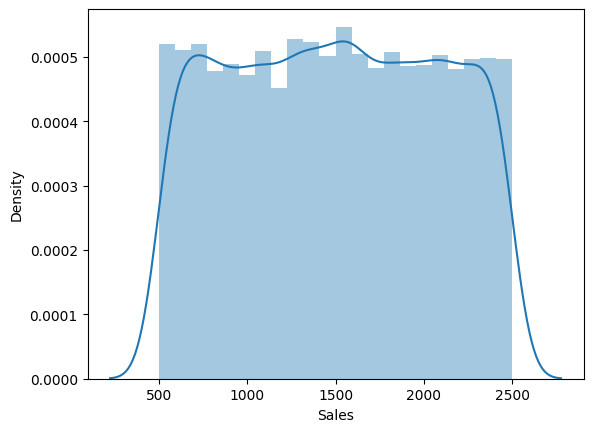

In [18]:
# Plot Sales Distribution
sns.distplot(df['Sales'])

C:\Users\albin\AppData\Local\Temp\ipykernel_22032\675154286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

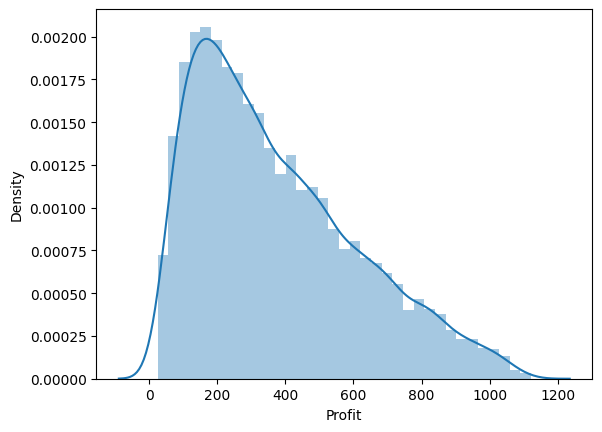

In [21]:
# Plot Profit Distribution
sns.distplot(df['Profit'])

C:\Users\albin\AppData\Local\Temp\ipykernel_22032\4220784121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount'])


<Axes: xlabel='Discount', ylabel='Density'>

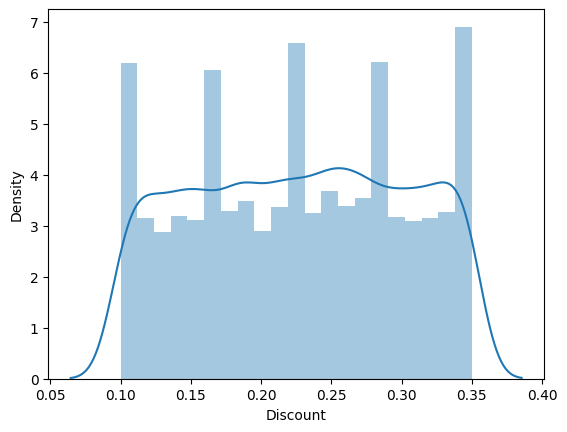

In [22]:
# Plot Discount Distribution
sns.distplot(df['Discount'])

In [25]:
# Number of category 
df['Category'].value_counts()

Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64

In [26]:
df['Sub Category'].value_counts()

Sub Category
Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: count, dtype: int64

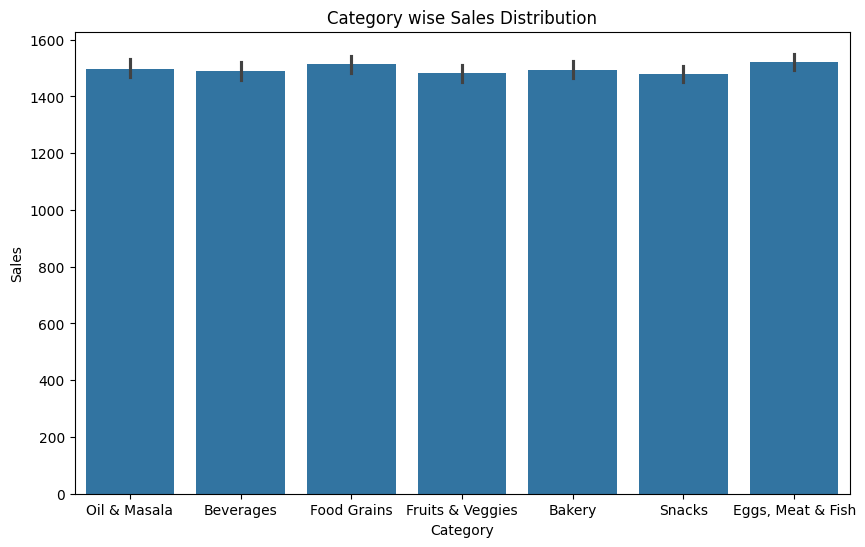

In [27]:
# plot Category wise Sales Distribution
plt.figure(figsize=(10,6))
sns.barplot(x = 'Category', y = 'Sales', data = df)
plt.title('Category wise Sales Distribution')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

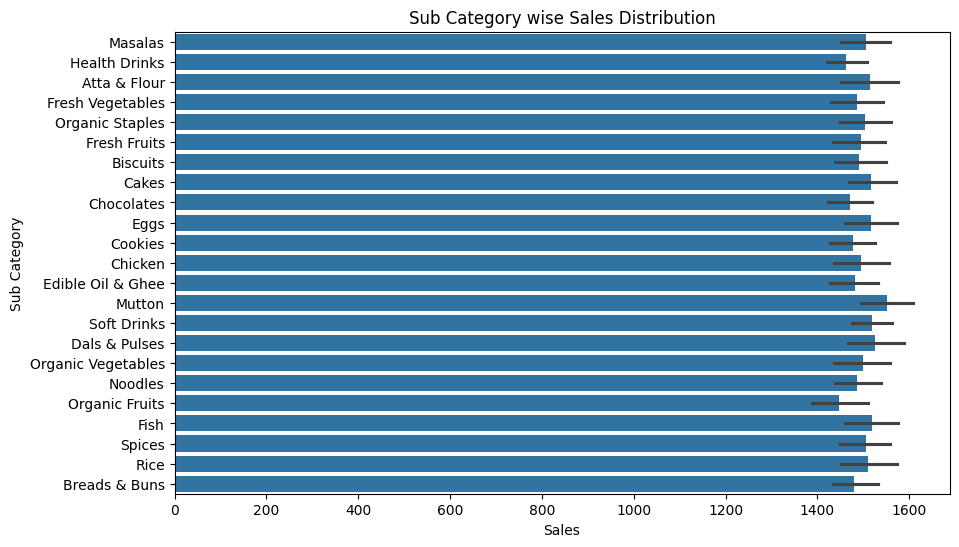

In [28]:
# plot Category wise Sales Distribution
plt.figure(figsize=(10,6))
sns.barplot(x = 'Sales', y = 'Sub Category', data = df)
plt.title('Sub Category wise Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Sub Category')
plt.show()

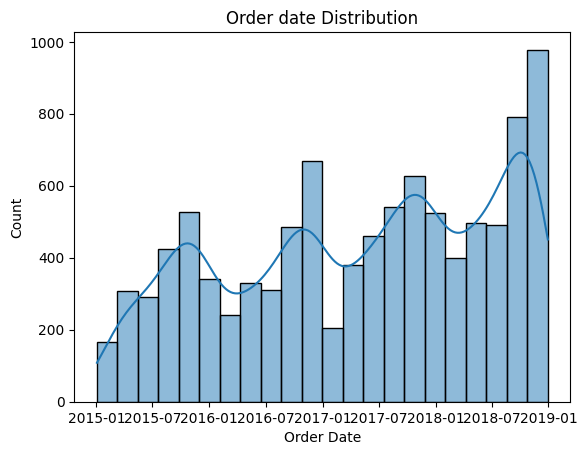

In [29]:
# Plot Order Date distribution
sns.histplot(df['Order Date'], kde=True)
plt.title('Order date Distribution')
plt.show()

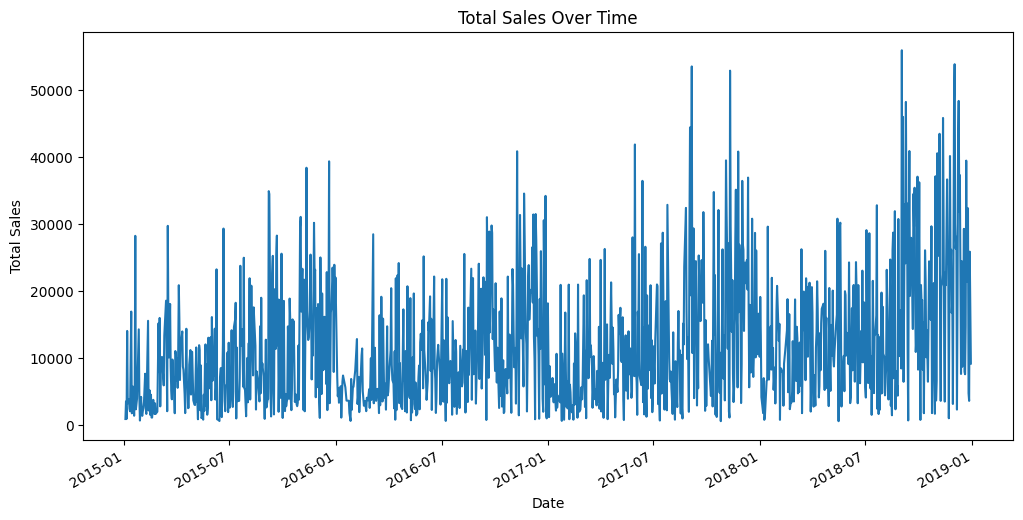

In [30]:
# plot Total Sales Over Time
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

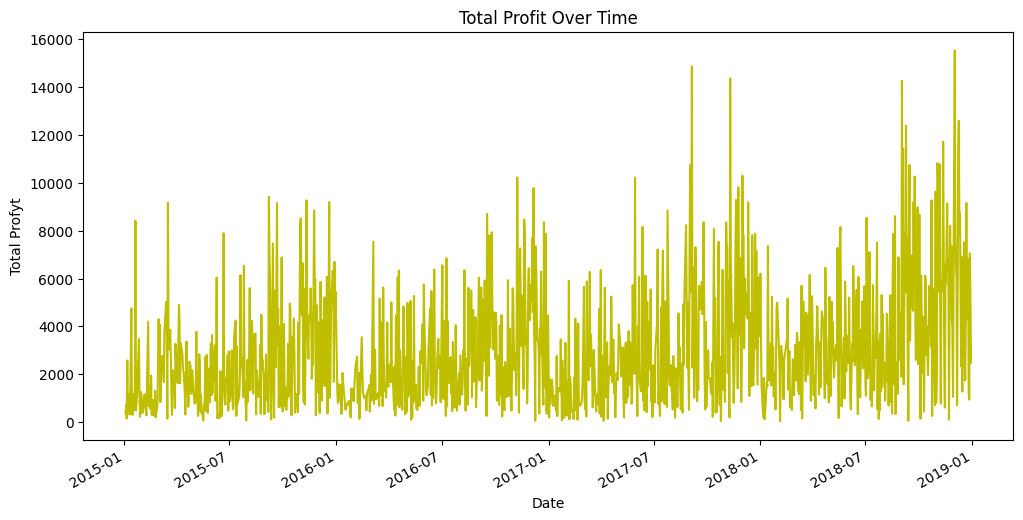

In [37]:
# Total Profit Over Time
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Profit'].sum().plot(color='y')
plt.title('Total Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profyt')
plt.show()

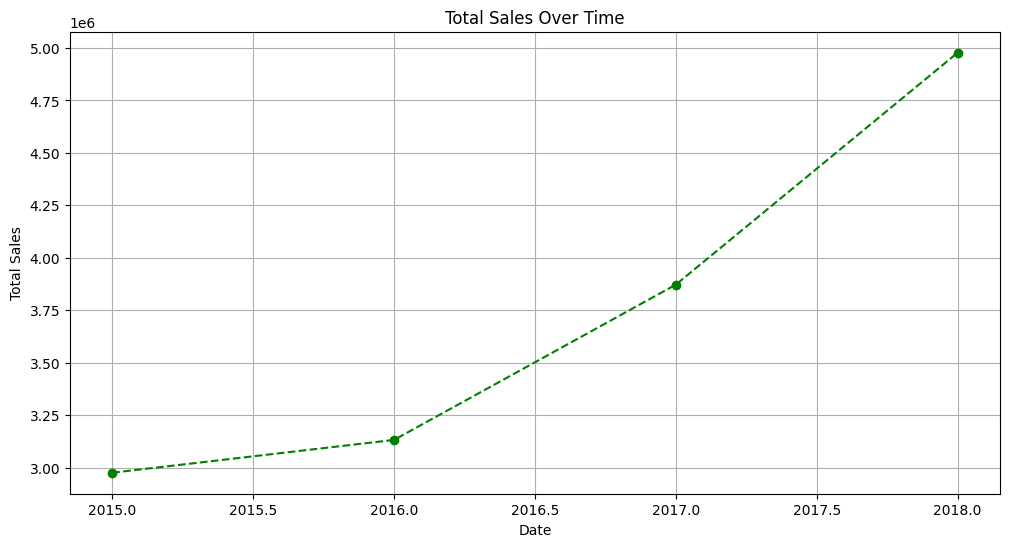

In [38]:
# Plote A line Graph for Total Sales Over Time
plt.figure(figsize=(12, 6))
df.groupby('Year')['Sales'].sum().plot(marker = 'o',color='g',linestyle='--', grid=True)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

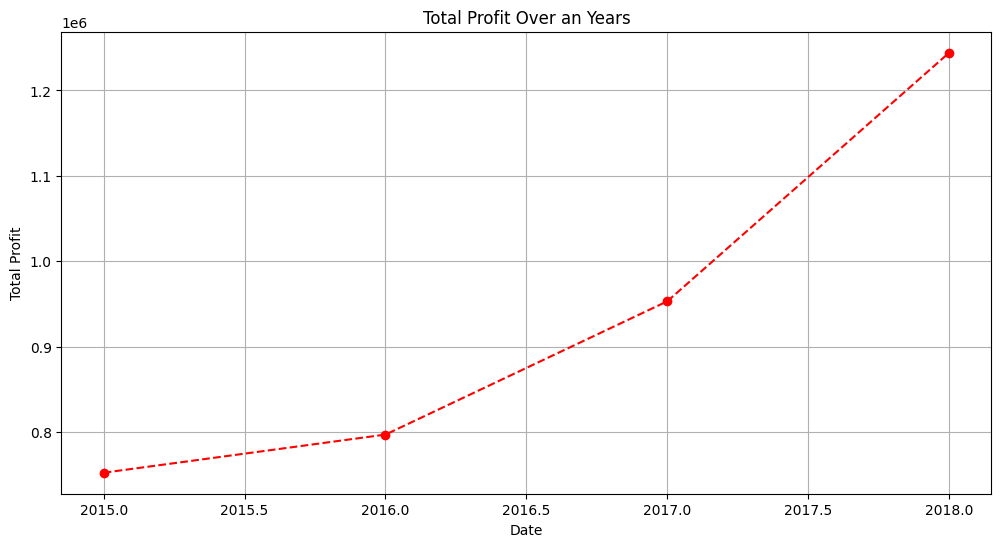

In [39]:
 plt.figure(figsize=(12, 6))
 df.groupby('Year')['Profit'].sum().plot(marker = 'o',color='r',linestyle='--', grid=True)
 plt.title('Total Profit Over an Years')
 plt.xlabel('Date')
 plt.ylabel('Total Profit')
 plt.show()

In [40]:
 # Sum up sales by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales

,Month,Sales
0,April,998453
1,August,1046807
2,December,2088076
3,February,456102
4,January,577972
5,July,1089385
6,June,1057808
7,March,1053980
8,May,1086920
9,November,2193924


In [41]:
 # Sum up profit by month
monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()
monthly_profit

,Month,Profit
0,April,247476.97
1,August,258912.09
2,December,530036.44
3,February,116082.21
4,January,142518.52
5,July,274594.57
6,June,263296.16
7,March,267347.33
8,May,263643.40
9,November,556048.05


In [42]:
 # Sum up profit by years
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()
yearly_profit

,Year,Profit
0,2015,752529.11
1,2016,797192.99
2,2017,953216.22
3,2018,1244182.88


In [520]:
 # Sum up sales by years
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
yearly_sales

,Year,Sales
0,2015,2975599
1,2016,3131959
2,2017,3871912
3,2018,4977512


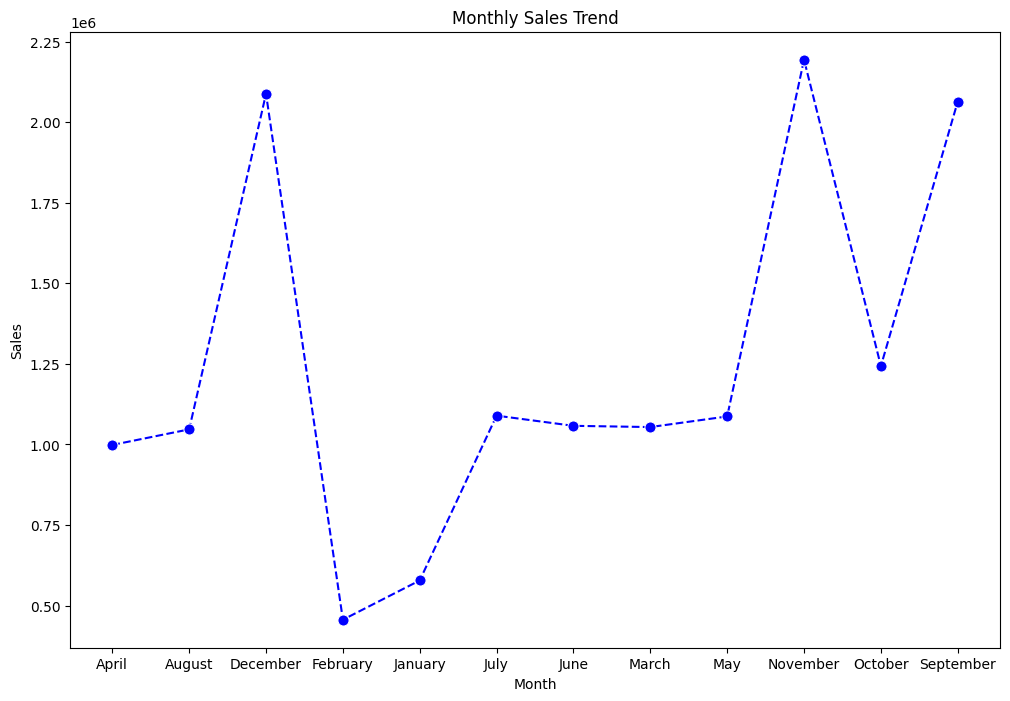

In [43]:
#Monthly Sales Trend
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'Month', y = 'Sales', data = monthly_sales,color='b',linestyle='--', markersize=8,marker='o')
plt.title('Monthly Sales Trend')
plt.show()

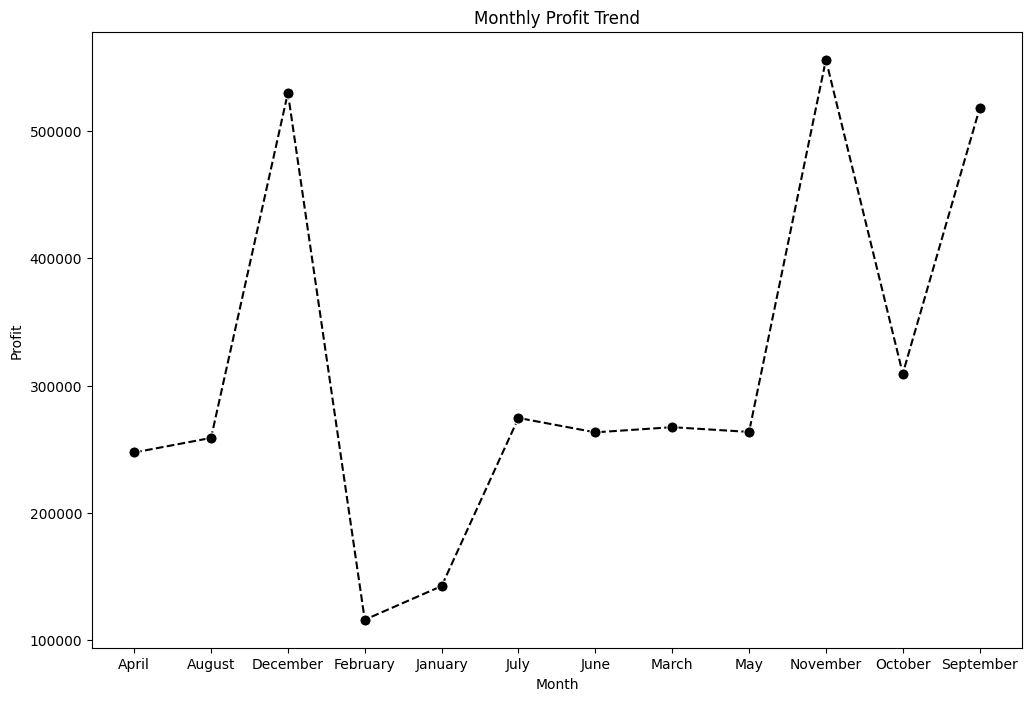

In [44]:
# Monthly Profit Trend
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'Month', y = 'Profit', data = monthly_profit,color='black',linestyle='--', markersize=8, marker='o')
plt.title('Monthly Profit Trend')
plt.show()

From Above 2 line chart shows that when an year or month increases the profit and sales also increases

In [45]:
# we want to find the Yearly Sales
# we group by Year and get the total number of sales for each year
Yearly_Sales=df.groupby("Year")["Sales"].sum()

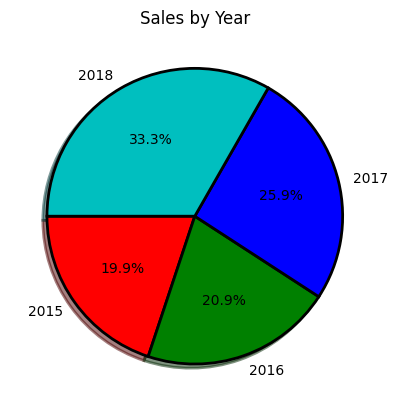

In [46]:
# a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index, colors = ['r','g','b','c'], autopct='%0.1f%%',shadow = True, startangle = 180, wedgeprops = {'linewidth':2,'width':1,'edgecolor':'k'})
plt.title('Sales by Year')
plt.show()

the sales is greater in 2018  which is 33.3 than previous years

In [47]:
# we want to find the Yearly Profit
# we group by Year and get the total number of profit for each year
Yearly_pro = df.groupby('Year')['Profit'].sum()

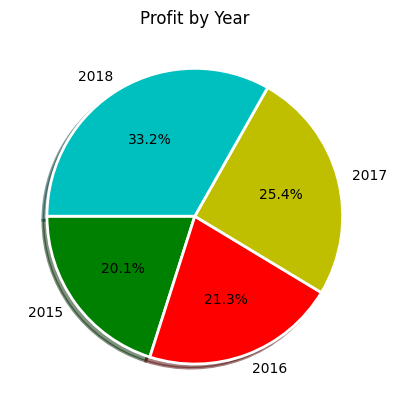

In [48]:
# we create a pie chart with the Profit by year
plt.pie(Yearly_pro, labels = Yearly_pro.index, colors = ['g','r','y','c'], autopct='%0.1f%%',shadow = True, startangle = 180, wedgeprops = {'linewidth':2,'width':1,'edgecolor':'w'})
plt.title('Profit by Year')
plt.show()

Here also the profit is in 2018 is greater than previous years 

In [527]:
# Sum up sales by category
cate_pro = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).reset_index()
cate_pro

,Category,Profit
0,Snacks,568178.85
1,"Eggs, Meat & Fish",567357.22
2,Fruits & Veggies,530400.38
3,Food Grains,529162.64
4,Bakery,528521.06
5,Beverages,525605.76
6,Oil & Masala,497895.29


In [528]:
 # Sum up Profit by Sub category
sub_cate_pro = df.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False).reset_index()
sub_cate_pro

,Sub Category,Profit
0,Health Drinks,267469.79
1,Soft Drinks,258135.97
2,Noodles,193685.81
3,Breads & Buns,190764.98
4,Cookies,190643.70
5,Chocolates,183849.34
6,Biscuits,169357.62
7,Masalas,168999.11
8,Edible Oil & Ghee,168593.58
9,Cakes,168398.46


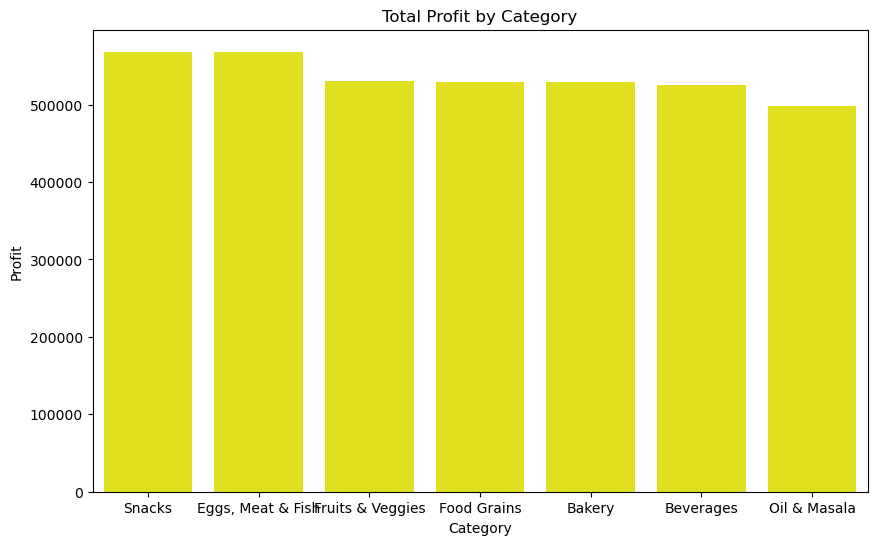

In [529]:
# Plot total profit by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit',color='yellow', data=cate_pro)
plt.title('Total Profit by Category')
plt.show()

Here snaks and egg&Meat is more than others

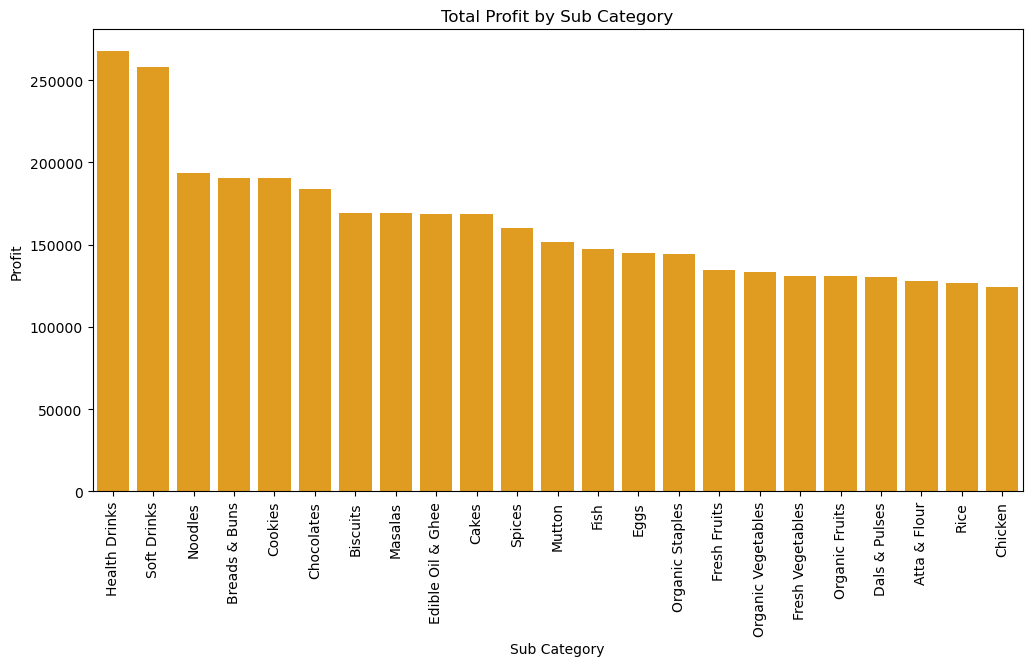

In [530]:
# Plot total profit by  Sub category
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Profit',color='orange', data=sub_cate_pro)
plt.xticks(rotation=90)
plt.title('Total Profit by Sub Category')
plt.show()

Health drinks are more in sub categery

In [531]:
 # Sum up Profit by city
city_pro = df.groupby('City')['Profit'].sum().reset_index()
city_pro

,City,Profit
0,Bodi,173655.13
1,Chennai,160921.33
2,Coimbatore,157399.41
3,Cumbum,156355.13
4,Dharmapuri,141593.05
5,Dindigul,144872.95
6,Kanyakumari,172217.74
7,Karur,169305.94
8,Krishnagiri,160477.48
9,Madurai,152548.61


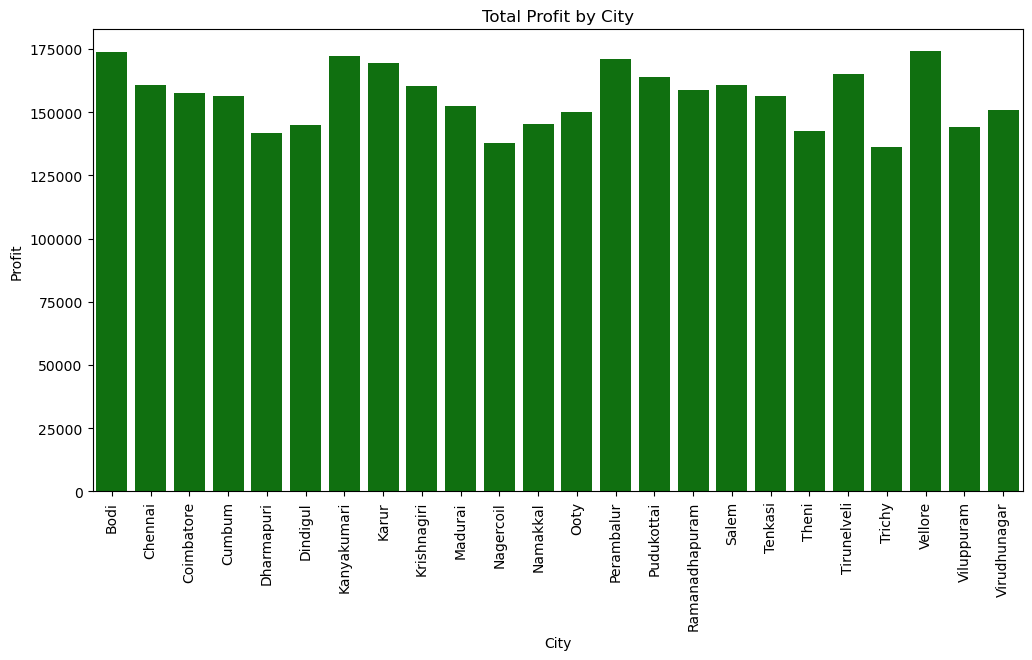

In [532]:
# Plot Total Profit by City
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Profit',color='green', data=city_pro)
plt.xticks(rotation=90)
plt.title('Total Profit by City')
plt.show()

Vellore is greater profit occured city

In [533]:
 # Sum up Sales by city
city_sales = df.groupby('City')['Sales'].sum().reset_index()
city_sales

,City,Sales
0,Bodi,667177
1,Chennai,634963
2,Coimbatore,634748
3,Cumbum,626047
4,Dharmapuri,571553
5,Dindigul,575631
6,Kanyakumari,706764
7,Karur,642273
8,Krishnagiri,637273
9,Madurai,617836


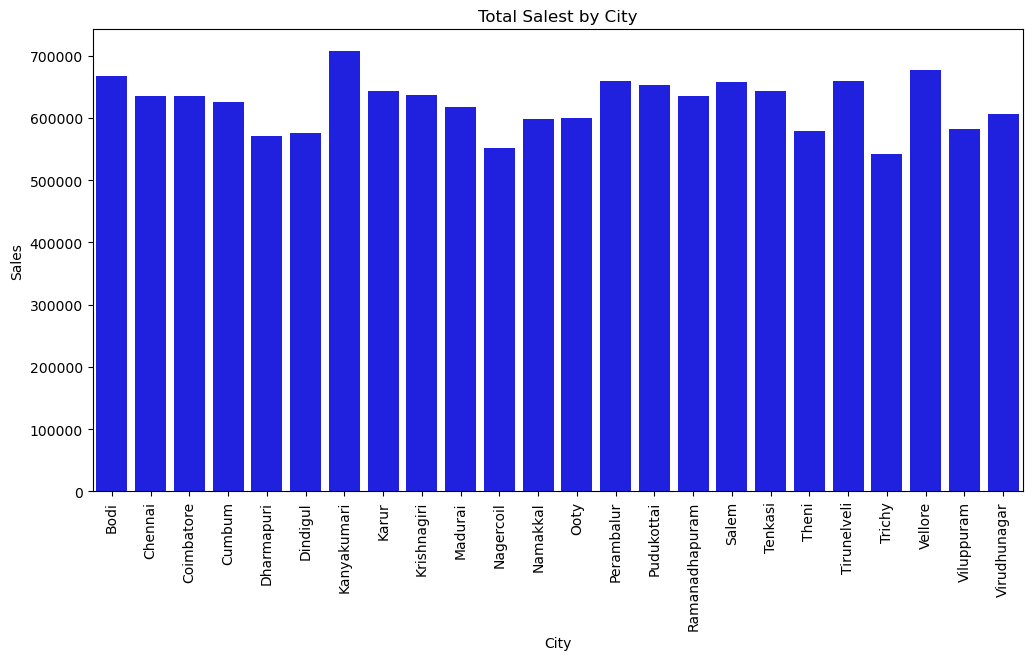

In [534]:
# Plot Total Sales by City
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales',color='b', data=city_sales)
plt.xticks(rotation=90)
plt.title('Total Salest by City')
plt.show()

Here Kanyakuman is greater sales city than others

In [535]:
# check the profit by region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False).reset_index()

In [536]:
print(region_profit)

    Region      Profit
0     West  1192004.61
1     East  1074345.58
2  Central   856806.84
3    South   623562.89
4    North      401.28


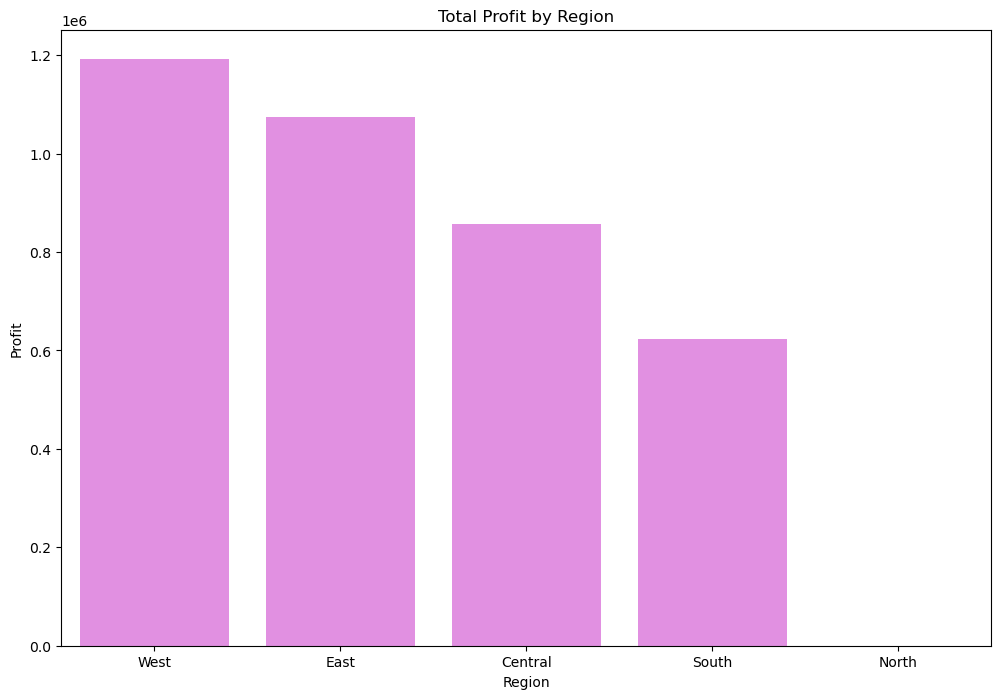

In [537]:
# plot Total Profit by Region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Profit',color='violet' ,data=region_profit)
plt.title('Total Profit by Region')
plt.show()

In [538]:
# check the profit by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

In [539]:
region_sales

,Region,Sales
0,West,4798743
1,East,4248368
2,Central,3468156
3,South,2440461
4,North,1254


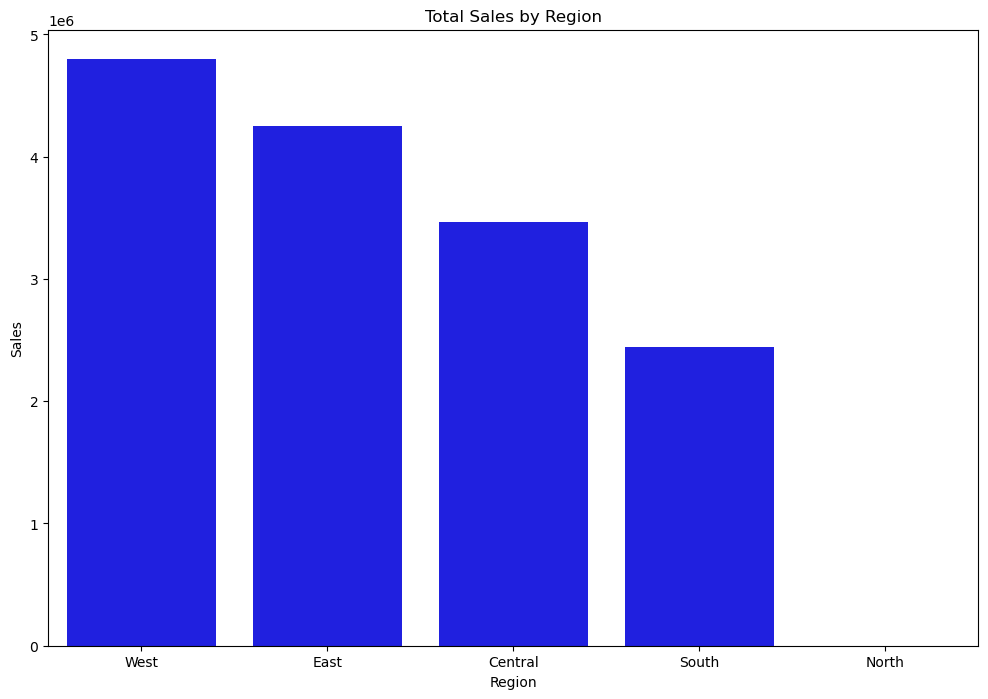

In [540]:
# plot Total Sales by Region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales',color='b' ,data=region_sales)
plt.title('Total Sales by Region')
plt.show()

In tne Above 2 chars says that west region is greater 

In [541]:
# Grouping discount with profit
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()
discount_profit

,Discount,Profit
0,0.10,361.888415
1,0.11,380.764704
2,0.12,362.944667
3,0.13,396.233538
4,0.14,374.307375
5,0.15,373.710755
6,0.16,383.132176
7,0.17,378.569196
8,0.18,362.008469
9,0.19,371.424337


In [542]:
category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales',ascending=False).reset_index()
category_sales_profit

,Category,Sales,Profit
0,"Eggs, Meat & Fish",2267401,567357.22
1,Snacks,2237546,568178.85
2,Food Grains,2115272,529162.64
3,Bakery,2112281,528521.06
4,Fruits & Veggies,2100727,530400.38
5,Beverages,2085313,525605.76
6,Oil & Masala,2038442,497895.29


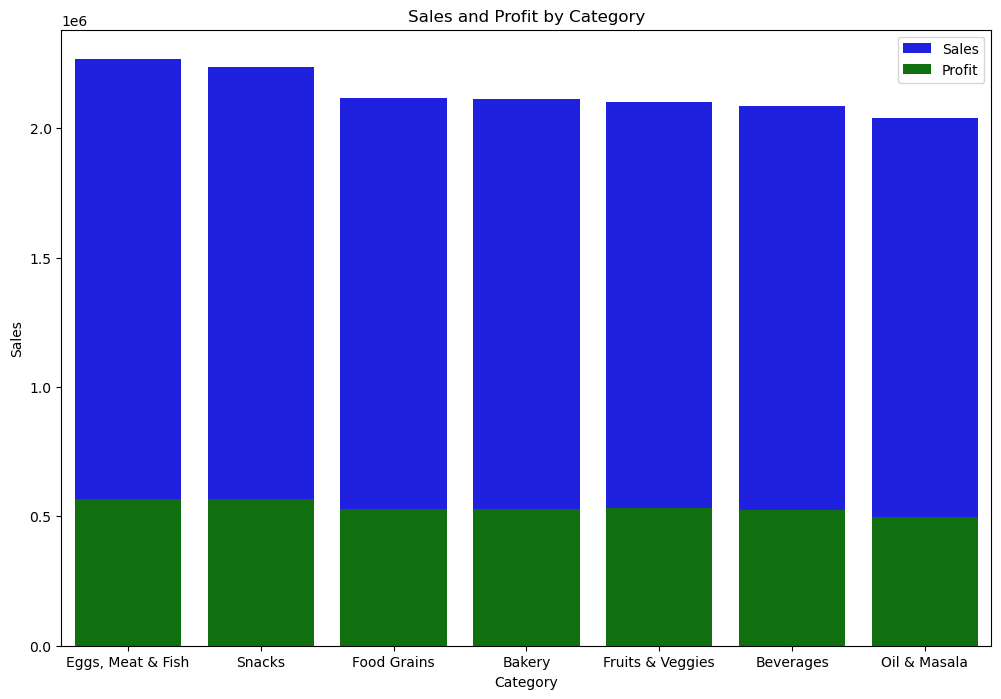

In [543]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Sales', data=category_sales_profit, color='b', label='Sales')
sns.barplot(x='Category', y='Profit', data=category_sales_profit, color='green', label='Profit')
plt.title('Sales and Profit by Category')
plt.legend()
plt.show()

From the category both sales and profit distributes equally in 'egg,meat&Fish

In [544]:
# groupby for geting the avg profit region
df['Avg Profit Region'] = df.groupby('Region')['Profit'].transform('mean')

In [545]:
# groupby for geting the avg Sales region
df['Avg Sales Region'] = df.groupby('Region')['Sales'].transform('mean')

In [546]:
# # groupby for geting the avg profit sub category
df['Avg Profit Sub Category'] = df.groupby('Sub Category')['Profit'].transform('mean')

In [547]:
# groupby for geting the avg sales sub category
df['Avg Sales Sub Category'] = df.groupby('Sub Category')['Sales'].transform('mean')

In [548]:
#  groupby for geting the Discount profit interaction
df['Discount Profit Interaction'] = df['Discount'] * df['Profit']

In [549]:
# np.log1p to handle 0 values
df['Log Sales'] = np.log1p(df['Sales'])

In [550]:
df.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month Number,Month,Year,Avg Profit Region,Avg Sales Region,Avg Profit Sub Category,Avg Sales Sub Category,Discount Profit Interaction,Log Sales
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,November,2017,401.280000,1254.000000,365.008877,1506.436285,48.1536,7.134891
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,November,2017,385.153113,1507.387894,372.002490,1462.363004,26.9640,6.620073
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,June,2017,372.152548,1498.202623,362.212748,1514.586402,34.6920,7.766841
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,October,2016,385.153113,1507.387894,370.828616,1485.429379,22.4000,6.799056
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,October,2016,385.153113,1507.387894,387.464758,1502.497312,238.7970,7.764721


In [551]:
# we have drop unwanted columns which is not contribute the model building
columdrp = ['Customer Name','State','Order ID','Order Date','Month']
df.drop(columns=columdrp,inplace=True)

In [552]:
df.head(10)

,Category,Sub Category,City,Region,Sales,Discount,Profit,Month Number,Year,Avg Profit Region,Avg Sales Region,Avg Profit Sub Category,Avg Sales Sub Category,Discount Profit Interaction,Log Sales
0,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,11,2017,401.280000,1254.000000,365.008877,1506.436285,48.1536,7.134891
1,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,11,2017,385.153113,1507.387894,372.002490,1462.363004,26.9640,6.620073
2,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,6,2017,372.152548,1498.202623,362.212748,1514.586402,34.6920,7.766841
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,10,2016,385.153113,1507.387894,370.828616,1485.429379,22.4000,6.799056
4,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,10,2016,385.153113,1507.387894,387.464758,1502.497312,238.7970,7.764721
5,Food Grains,Organic Staples,Dharmapuri,West,2305,0.26,322.70,6,2015,372.152548,1498.202623,387.464758,1502.497312,83.9020,7.743270
6,Fruits & Veggies,Fresh Vegetables,Trichy,West,826,0.33,346.92,6,2015,372.152548,1498.202623,370.828616,1485.429379,114.4836,6.717805
7,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,West,1847,0.32,147.76,6,2015,372.152548,1498.202623,364.954878,1493.799458,47.2832,7.521859
8,Bakery,Biscuits,Tirunelveli,West,791,0.23,181.93,6,2015,372.152548,1498.202623,368.970850,1490.376906,41.8439,6.674561
9,Bakery,Cakes,Chennai,West,1795,0.27,484.65,6,2015,372.152548,1498.202623,372.562965,1516.840708,130.8555,7.493317


In [553]:
df.describe()

,Sales,Discount,Profit,Month Number,Year,Avg Profit Region,Avg Sales Region,Avg Profit Sub Category,Avg Sales Sub Category,Discount Profit Interaction,Log Sales
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082,7.809686,2016.722233,374.937082,1496.596158,374.937082,1496.596158,85.042451,7.224352
std,577.559036,0.074636,239.932881,3.284654,1.123555,5.441641,5.956266,10.110454,22.845996,63.406745,0.437854
min,500.000000,0.100000,25.250000,1.000000,2015.000000,368.836350,1254.000000,356.465201,1446.557471,2.981000,6.216606
25%,1000.000000,0.160000,180.022500,5.000000,2016.000000,372.152548,1491.702247,366.622500,1479.254980,36.837300,6.908755
50%,1498.000000,0.230000,320.780000,9.000000,2017.000000,372.152548,1492.964270,373.821685,1495.681034,68.005400,7.312553
75%,1994.750000,0.290000,525.627500,11.000000,2018.000000,377.228083,1498.202623,381.714828,1516.840708,116.906550,7.598775
max,2500.000000,0.350000,1120.950000,12.000000,2018.000000,401.280000,1507.387894,399.046098,1551.269036,372.096000,7.824446


In [554]:
# converting the categorical columns in to numeric 
from sklearn.preprocessing import LabelEncoder

In [555]:
le = LabelEncoder()

Category,Sub Category,City,Region these are the categorical columns

In [556]:
df['Category'] = le.fit_transform(df['Category'])
df['Sub Category'] = le.fit_transform(df['Sub Category'])
df['City'] = le.fit_transform(df['City'])
df['Region'] = le.fit_transform(df['Region'])

In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Category                     9994 non-null   int32  
 1   Sub Category                 9994 non-null   int32  
 2   City                         9994 non-null   int32  
 3   Region                       9994 non-null   int32  
 4   Sales                        9994 non-null   int64  
 5   Discount                     9994 non-null   float64
 6   Profit                       9994 non-null   float64
 7   Month Number                 9994 non-null   int32  
 8   Year                         9994 non-null   int32  
 9   Avg Profit Region            9994 non-null   float64
 10  Avg Sales Region             9994 non-null   float64
 11  Avg Profit Sub Category      9994 non-null   float64
 12  Avg Sales Sub Category       9994 non-null   float64
 13  Discount Profit In

Now we dont have any categorical values in our dataset

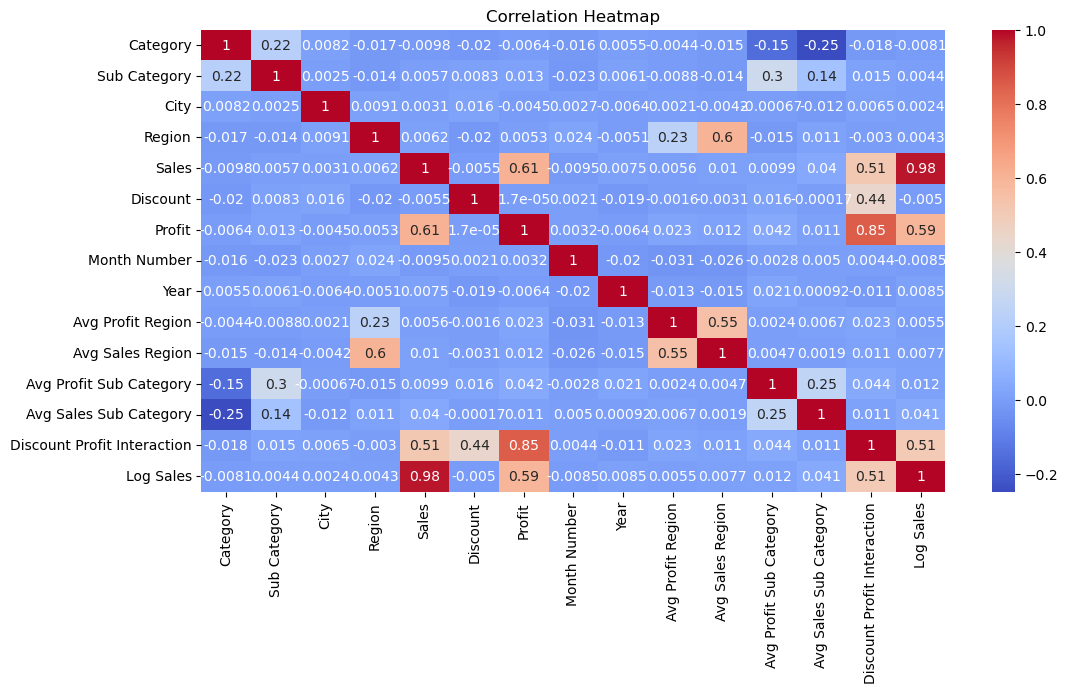

In [558]:
# plot correlation heat map for understanding the relationship between the feature we have
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

the sales and profit are more relationship between them and also newly created features are more relationship between and sales and profit

We have used to select sales is our target variable and others are selected as features

In [559]:
# for traing and testing the features and target variable
from sklearn.model_selection import train_test_split

In [560]:
# Select features and target variable
X = df.drop(columns=['Sales'])  # Drop the target
y = df['Sales']   # Target variable

In [561]:
# Split the data, 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [562]:
from sklearn.preprocessing import StandardScaler

In [563]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [564]:
# Machine learning algorithm for model building
from sklearn.linear_model import LinearRegression

In [565]:
# Initialize the model
supmodel = LinearRegression()

In [566]:
# Train the model
supmodel.fit(X_train, y_train)

LinearRegression()

In [567]:
# Make predictions
y_pred = supmodel.predict(X_test)

In [568]:
print(y_pred)

[ 258.34396867 1438.33975343 1254.59185355 ... 1718.42041462  832.83457182
  471.10007228]


In [569]:
# Evaluate the model performance using Mean Squared Error (MSE) and R-squared.
from sklearn.metrics import mean_squared_error, r2_score

In [570]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [571]:
# Print the mse and r2
print(f'Mean Squared Error : {mse}')
print(f'R-squared : {r2}')

Mean Squared Error : 12610.997140006548
R-squared : 0.9617636077541666


MSE represents the average squared difference between the actual and predicted values. A lower MSE indicates better model performance.
the MSE is relatively low, meaning the model's predictions are quite close to the actual values.

R² value is closer to 1 indicate that the model explains most of the variance.
An R² of 0.9617 means your model explains around 96% of the variance in the data

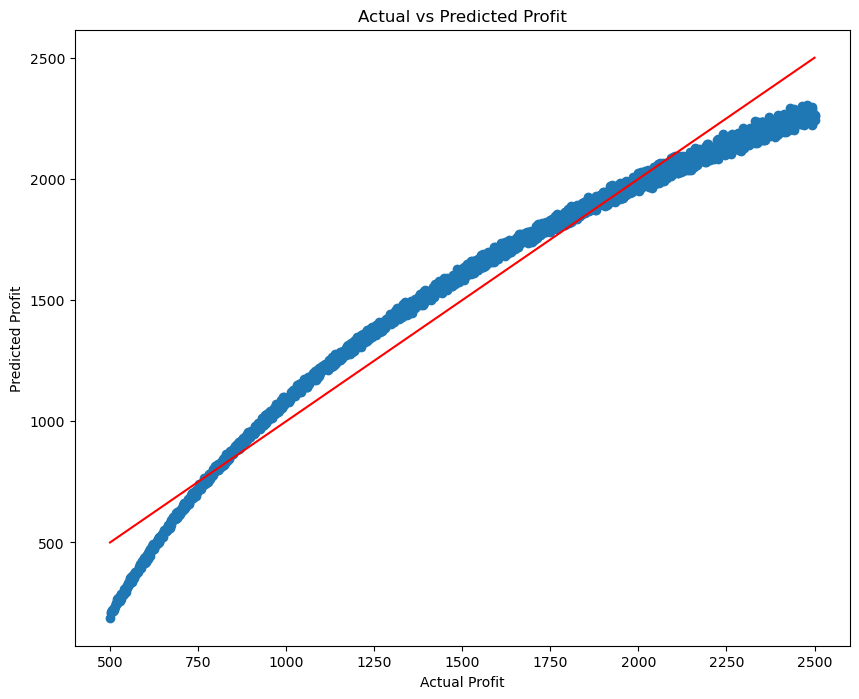

In [572]:
#Actual vs Predicted Profit
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

From this graph we can say that our model is good, the blue doted line is slitly passing through some the red line These represent predictions where the predicted profit is very close to the actual profit, indicating that the model is performing well for those data points.

The linear regression model provided a reasonable prediction for sales based on the features selected.

we have a limited features for this model building however with this limited features we can predict a sales model.

The model R2 -squared value indicates a good fit,explaining a significant portion of the variance insales.

Further refinement of the model could involvetrying different machinelearning algorithms,such as decision trees or ensemble methods.

Futurely Used ;

1. Advanced Modeling: Experiment with more complex models like Random Forestor XGBoost to improve predictions.

2. Feature Engineering: Explore additional features or interactions between features to enhance model performance.

3. Model Deployment:Integrate the model in to a dashboard for real-time sales prediction and business analytics.